# Project Luther
## What Makes a Comparable Company?
### Hasan Haq

In [3]:
import data
import matplotlib.pyplot as plt
import good_morning as gm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import math
import seaborn as sns
import csv
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from tqdm import tqdm
%matplotlib inline

## **Russell 1000 Stock Tickers**

In [7]:
ticks = []

with open('russ1000.csv', 'r', encoding='utf-8') as f:
    csvfile = csv.reader(f)
    next(csvfile, None)
    for i in csvfile:
        ticks.append(i[0])

['A',
 'AA',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABMD',
 'ABT',
 'ACAD',
 'ACC',
 'ACGL',
 'ACHC',
 'ACM',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFG',
 'AFL',
 'AFSI',
 'AGCO',
 'AGIO',
 'AGN',
 'AGNC',
 'AGO',
 'AGR',
 'AHL',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'AKRX',
 'AL',
 'ALB',
 'ALGN',
 'ALK',
 'ALKS',
 'ALL',
 'ALLE',
 'ALLY',
 'ALNY',
 'ALR',
 'ALSN',
 'ALXN',
 'AMAT',
 'AMCX',
 'AME',
 'AMG',
 'AMGN',
 'AMH',
 'AMP',
 'AMT',
 'AMTD',
 'AMZN',
 'AN',
 'ANAT',
 'ANET',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APAM',
 'APC',
 'APD',
 'APH',
 'APLE',
 'AQB',
 'AR',
 'ARE',
 'ARMK',
 'ARNC',
 'ARRS',
 'ARW',
 'ASB',
 'ASH',
 'ASIX',
 'ATHN',
 'ATO',
 'ATR',
 'ATVI',
 'AVB',
 'AVGO',
 'AVT',
 'AVY',
 'AWH',
 'AWI',
 'AWK',
 'AXP',
 'AXS',
 'AXTA',
 'AYI',
 'AZO',
 'BA',
 'BAC',
 'BAH',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BC',
 'BCR',
 'BDN',
 'BDX',
 'BEAV',
 'BEN',
 'BERY',
 'BF.A',
 'BF.B',
 'BG',
 'B

# **View an example Morningstar data frame**

In [10]:
kr = gm.KeyRatiosDownloader()
ms = kr.download('APA')
ms[0]

Period,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Key Financials USD,,,,,,,,,,,
Revenue USD Mil,8074.00,9962.00,12390.00,8615.00,12092.00,16888.00,16564.00,14438.00,12801.00,6366.00,4862.00
Gross Margin %,82.10,82.00,83.30,79.00,81.70,82.80,81.40,79.70,80.40,67.60,63.40
Operating Income USD Mil,3917.00,4855.00,932.00,326.00,5435.00,8093.00,5012.00,3908.00,-2809.00,-28226.00,-22969.00
Operating Margin %,48.50,48.70,7.50,3.80,44.90,47.90,30.30,27.10,-21.90,-443.40,-472.40
Net Income USD Mil,2552.00,2812.00,712.00,-285.00,3032.00,4584.00,2001.00,2232.00,-5403.00,-23119.00,-18005.00
Earnings Per Share USD,7.64,8.39,2.09,-0.87,8.46,11.47,4.92,5.50,-14.06,-61.20,-47.64
Dividends USD,0.45,0.60,0.60,0.60,0.60,0.60,0.66,0.77,0.95,1.00,1.00
Payout Ratio % *,NaN,7.10,28.70,NaN,7.10,5.90,13.40,11.00,NaN,NaN,NaN
Shares Mil,333.00,335.00,337.00,336.00,359.00,400.00,391.00,406.00,384.00,378.00,379.00


# **Iterate through and populate data for each ticker**

In [8]:
sic_num = []
ceo_good = []
ceo_age = []
score = []
cap = []
ocf = []
inv = []
capex = []
fcf = []
div = []
hist_eps = []
marg = []
cash = []
debt = []
ebitda = []
beta = []
inst = []
yr_hi = []
yr_200_hi = []
yr_50_hi = []
vol = []
px_gr = []
eps_gr = []
sg = []
rd = []
tax = []
roe = []
dso = []
ticky = []
    
kr = gm.KeyRatiosDownloader()

for t in tqdm(ticks):
    try:
        share = data.Share(t)
        ms = kr.download(t)
    except:
        continue
    try:
        temp = data.wsj(t)
        cash.append(temp[0])
        debt.append(temp[1])
        ebitda.append(temp[2])
    except:
        continue
    try:
        temp = data.reut_fin(t)
        beta.append(temp[0])
        inst.append(temp[1])
    except:
        beta.append(1)
        inst.append(0)
    try:
        sic_num.append(data.query_sic(t))
    except:
        sic_num.append(0)
    try:
        ceo_good.append(data.ceo(t)[2])
    except:
        ceo_good.append(False)
    try:    
        ceo_age.append(int(data.ceo(t)[1]))
    except:
        ceo_age.append(0)
    try:
        score.append(data.anal_score(t))
    except:
        score.append(0)
    try:
        cap.append(data.mb(share.get_market_cap()))
    except:
        cap.append(0)
    try:
        ocf.append(int(ms[0].iloc[10][-1]))
    except:
        ocf.append(-1)
    try:
        capex.append(ms[7].iloc[2][-1])
    except:
        capex.append(-1)
    try:
        fcf.append(float(int(float(np.nan_to_num(ms[7].iloc[3][-1]))*100)/100.00))
    except:
        fcf.append(-1)
    try:
        hist_eps.append(float(int(float(np.nan_to_num(ms[6].iloc[0][-1]))*100))/100.00)
    except:
        hist_eps.append(0.00)
    try:
        marg.append(float(np.nan_to_num(ms[0].iloc[3][-1])))
    except:
        marg.append(-1.00)
    try:
        sg.append(float(np.nan_to_num(ms[1].iloc[3][-1])))
    except:
        sg.append(0.00)
    try:
        rd.append(float(np.nan_to_num(ms[1].iloc[4][-1])))
    except:
        rd.append(0.00)
    try:
        tax.append(data.pct(np.nan_to_num(ms[2].iloc[0][-1])))
    except:
        tax.append(0.00)
    try:
        roe.append(float(np.nan_to_num(ms[2].iloc[5][-1])))
    except:
        roe.append(0.0)
    try:
        inv.append(int(np.nan_to_num(ms[10].iloc[5][-1])))
    except:
        inv.append(-1)
    try:
        dso.append(int(np.nan_to_num(ms[10].iloc[0][-1])))
    except:
        dso.append(-1)
    try:
        div.append(data.pct(share.get_dividend_yield()))
    except:
        div.append(0.00)
    try:
        yr_hi.append(data.pct(share.get_percent_change_from_year_high()))
    except:
        yr_hi.append(0.0)
    try:
        yr_200_hi.append(data.pct(share.get_percent_change_from_200_day_moving_average()))
    except:
        yr_200_hi.append(0.0)
    try:
        yr_50_hi.append(data.pct(share.get_percent_change_from_50_day_moving_average()))
    except:
        yr_50_hi.append(0.0)  
    try:
        vol.append(float(int(100*float(share.get_avg_daily_volume())/1000000.00)/100))
    except:
        vol.append(0.00)
    try:
        px_gr.append(float(int(100*float(share.get_one_yr_target_price())/float(share.get_price())))/100)
    except:
        px_gr.append(0.00)
    try:
        eps_gr.append(float(int(100*float(share.get_EPS_estimate_next_year())/float(share.get_EPS_estimate_current_year())))/100)
    except:
        eps_gr.append(0.00)
    ticky.append(t)

100%|██████████| 1007/1007 [1:08:07<00:00,  4.47s/it]


## **Create the DataFrame**

In [10]:
df = pd.DataFrame({'ticker': ticky, 'cash': cash, 'debt': debt, 'ebitda': ebitda, 'cap': cap, 'sic_num': sic_num, 
                   'ceo_good': ceo_good, 'ceo_age': ceo_age, 'score': score, 'ocf': ocf, 'inv': inv, 'capex': capex, 
                   'fcf': fcf, 'div': div, 'hist_eps': hist_eps, 'marg': marg, 'beta': beta, 'inst': inst,
                   'yr_hi': yr_hi, 'yr_200_hi': yr_200_hi, 'yr_50_hi': yr_50_hi, 'vol': vol, 'px_gr': px_gr,
                   'eps_gr': eps_gr, 'sg': sg, 'rd': rd, 'tax': tax, 'roe': roe, 'dso': dso})
df.to_csv('df_1000.csv')
df.to_pickle('df_1000.pkl')
# df = pd.read_pickle('df.pkl')
df

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,roe,score,sg,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi
0,1.00,6890.0,4.24,853,0,False,1445,1.25,20,1028,...,-11.81,0,3.89,5,0.00,AA,4.75,27.40,16.75,-3.24
1,1.00,22660.0,14.49,6949,54,False,20754,0.89,16,8900,...,139.04,5,29.51,6,0.00,AAL,6.73,7.13,-7.16,-13.03
2,1.06,11950.0,2.92,91,58,False,1232,0.15,16,1147,...,17.09,15,36.51,8,37.71,AAP,1.05,1.56,-4.70,-8.71
3,1.14,682750.0,5.94,67155,55,True,87032,1.87,22,68986,...,34.69,40,6.55,5,25.85,AAPL,31.63,14.20,7.87,-1.88
4,0.87,19310.0,0.35,2768,54,False,4481,1.75,22,2020,...,78.77,7,1.41,7,31.55,ABC,2.78,6.68,6.62,-5.11
5,0.84,3360.0,14.13,11,62,False,2240,0.00,34,384,...,-0.06,14,26.59,10,107.73,ACHC,1.22,-12.24,5.27,-41.00
6,1.92,5630.0,1.10,692,52,False,4125,0.00,74,926,...,2.84,9,0.66,10,0.00,ACM,1.55,9.77,-1.32,-10.17
7,1.17,70760.0,1.38,4908,56,True,27,2.11,43,5516,...,64.54,19,15.63,10,20.43,ACN,2.53,-2.25,-3.05,-9.61
8,0.86,25300.0,1.49,2106,54,False,5877,2.72,12,2221,...,8.89,2,3.27,5,16.63,ADM,3.42,0.06,-2.37,-8.17
9,1.00,6090.0,2.60,2139,0,False,3564,0.00,45,1059,...,-31.17,6,7.26,5,471.54,ADNT,1.37,18.94,8.61,-3.53


## Add New Columns

In [238]:
# Create EBITDA multiple and leverage multiple columns
df['ebitda_mult'] = (df['cap'] + df['debt'] - df['cash']/df['ebitda'])
df['debt_mult'] = (df['debt']/df['ebitda'])

# Create R&D dummy variable column
df['rd_dum'] = [1 if x != 0 else 0 for x in df['rd']]

## **Clean Up Data (Handle Outliers)**

In [239]:
# Delete all items where market cap = 0
df_temp = df.loc[df['cap']!=0]

# Replace hist_eps outliers with mean/max/min
eps_calc = df_temp['hist_eps'].loc[((df_temp['hist_eps']<200) | (df_temp['hist_eps']>-200)) & (df_temp['hist_eps'] != 0)]
df_temp.loc[df_temp['hist_eps']>=200, 'hist_eps'] = float(int(float(max(eps_calc)*100)/100))
df_temp.loc[df_temp['hist_eps']<=-200, 'hist_eps'] = float(int(float(min(eps_calc))*100)/100)
df_temp.loc[df_temp['hist_eps'] == 0, 'hist_eps'] = float(int(float(eps_calc.mean())*100)/100)

# Replace margin outliers with mean/max/min
marg_calc = df_temp['marg'].loc[((df_temp['marg']<90) & (df_temp['marg']>0))]
df_temp.loc[df_temp['marg']>=90, 'marg'] = float(int(float(max(marg_calc)*100)/100))
df_temp.loc[df_temp['marg']<=0, 'marg'] = float(int(float(min(marg_calc)*100)/100))

# Replace institutional % outliers with mean
inst_calc = df_temp['inst'].loc[(df_temp['inst'] != 0)]
df_temp.loc[(df_temp['inst'] == 0), 'inst'] = float(int(float(inst_calc.mean())*100)/100)

# Replace sg % outliers with mean
sg_calc = df_temp['sg'].loc[(df_temp['sg'] != 0)]
df_temp.loc[(df_temp['sg'] == 0), 'sg'] = float(int(float(sg_calc.mean())*100)/100)

# Replace tax % outliers with mean
tax_calc = df_temp['tax'].loc[(df_temp['tax'] != 0)]
df_temp.loc[(df_temp['tax'] == 0), 'tax'] = float(int(float(tax_calc.mean())*100)/100)

# Replace ceo_age with mean
ceo_calc = df_temp['ceo_age'].loc[(df_temp['ceo_age'] != 0)]
df_temp.loc[(df_temp['ceo_age'] == 0), 'ceo_age'] = float(int(float(ceo_calc.mean())*100)/100)

# Replace leverage multiple outliers with mean
debt_calc = df_temp['debt_mult'].loc[(df_temp['debt_mult'] < 20)]
df_temp.loc[(df_temp['debt_mult'] >= 20), 'debt_mult'] = float(int(float(max(debt_calc)*100)/100))

# Convert boolean to integer
df_temp['ceo_good'] = [1 if x == True else 0 for x in df_temp['ceo_good']]

# Fix the capex NA
capex_calc = df_temp['capex'].loc[(df_temp['capex'] == df_temp['capex'])]
df_temp.loc[(df_temp['capex'] != df_temp['capex']), 'capex'] = float(int(float(capex_calc.mean())*100)/100)

# Save the new DataFrame
df_clean = df_temp.copy()
df_clean.reindex()

//anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum
0,1.00,6630.0,4.24,853,56.13,0,1445,1.25,20,1028,...,5,29.84,AA,4.75,22.60,12.35,-6.88,8074.170233,1.405642,1
1,1.00,22670.0,14.49,6949,54.00,0,20754,0.89,16,8900,...,6,29.84,AAL,6.73,7.15,-7.14,-13.01,43423.219213,2.331910,0
2,1.06,11830.0,2.92,91,58.00,0,1232,0.15,16,1147,...,8,37.71,AAP,1.05,0.47,-5.73,-9.69,13061.920663,1.074106,0
3,1.14,686540.0,5.94,67155,55.00,1,87032,1.87,22,68986,...,5,25.85,AAPL,31.63,14.84,8.46,-1.33,773571.026542,1.261589,1
4,0.87,19500.0,0.35,2768,54.00,0,4481,1.75,22,2020,...,7,31.55,ABC,2.78,7.72,7.66,-4.18,23979.629703,2.218317,0
5,1.17,70490.0,1.38,4908,56.00,1,27,2.11,43,5516,...,10,20.43,ACN,2.53,-2.63,-3.42,-9.94,70516.110225,0.004895,0
6,0.86,25190.0,1.49,2106,54.00,0,5877,2.72,12,2221,...,5,16.63,ADM,3.42,-0.39,-2.82,-8.58,31066.051778,2.646105,0
7,0.38,12560.0,35.57,292,54.00,0,7576,3.40,31,2152,...,6,37.01,AEE,1.38,2.69,-0.66,-4.30,20135.864312,3.520446,0
8,1.13,7410.0,16.99,2041,58.00,0,20807,4.21,59,3814,...,6,54.82,AES,5.69,-6.26,-3.26,-15.62,28216.464866,5.455427,0
9,1.11,86010.0,2.51,1105,46.00,0,42726,1.32,49,4748,...,5,29.84,AGN,5.20,2.59,9.39,-23.89,128735.767270,8.998736,1


## View New Data

In [240]:
df_clean.to_csv('df_clean.csv')
df_clean

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum
0,1.00,6630.0,4.24,853,56.13,0,1445,1.25,20,1028,...,5,29.84,AA,4.75,22.60,12.35,-6.88,8074.170233,1.405642,1
1,1.00,22670.0,14.49,6949,54.00,0,20754,0.89,16,8900,...,6,29.84,AAL,6.73,7.15,-7.14,-13.01,43423.219213,2.331910,0
2,1.06,11830.0,2.92,91,58.00,0,1232,0.15,16,1147,...,8,37.71,AAP,1.05,0.47,-5.73,-9.69,13061.920663,1.074106,0
3,1.14,686540.0,5.94,67155,55.00,1,87032,1.87,22,68986,...,5,25.85,AAPL,31.63,14.84,8.46,-1.33,773571.026542,1.261589,1
4,0.87,19500.0,0.35,2768,54.00,0,4481,1.75,22,2020,...,7,31.55,ABC,2.78,7.72,7.66,-4.18,23979.629703,2.218317,0
5,1.17,70490.0,1.38,4908,56.00,1,27,2.11,43,5516,...,10,20.43,ACN,2.53,-2.63,-3.42,-9.94,70516.110225,0.004895,0
6,0.86,25190.0,1.49,2106,54.00,0,5877,2.72,12,2221,...,5,16.63,ADM,3.42,-0.39,-2.82,-8.58,31066.051778,2.646105,0
7,0.38,12560.0,35.57,292,54.00,0,7576,3.40,31,2152,...,6,37.01,AEE,1.38,2.69,-0.66,-4.30,20135.864312,3.520446,0
8,1.13,7410.0,16.99,2041,58.00,0,20807,4.21,59,3814,...,6,54.82,AES,5.69,-6.26,-3.26,-15.62,28216.464866,5.455427,0
9,1.11,86010.0,2.51,1105,46.00,0,42726,1.32,49,4748,...,5,29.84,AGN,5.20,2.59,9.39,-23.89,128735.767270,8.998736,1


## **Check Out the Correlation**

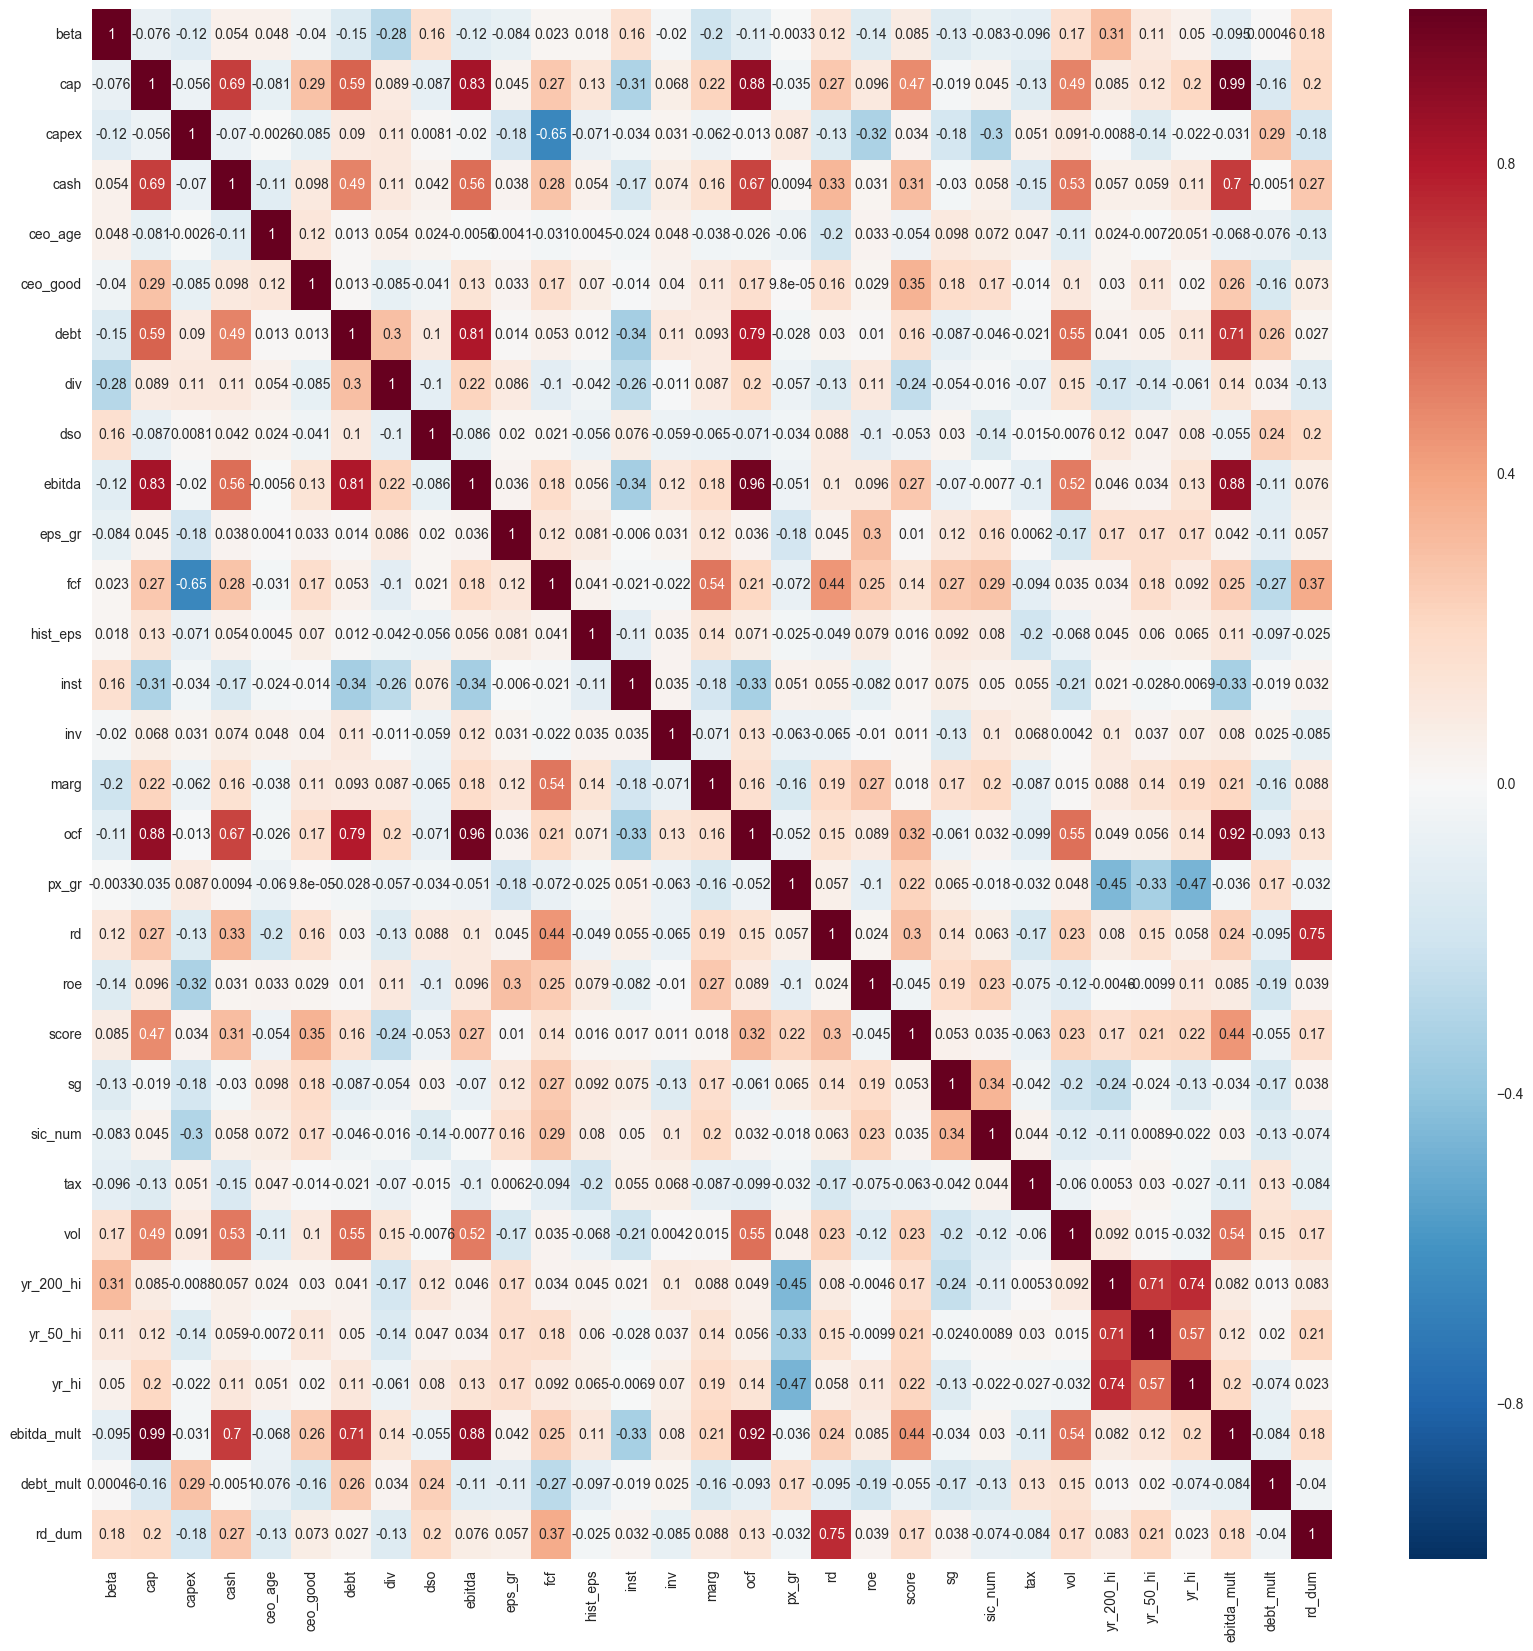

In [241]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_clean.corr(), annot=True, ax=ax);

## **Make our Dummy Variables**

In [242]:
df_cleandum = pd.get_dummies(df_clean, columns=['sic_num'], drop_first=True)
df_cleandum

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,ebitda_mult,debt_mult,rd_dum,sic_num_3,sic_num_5,sic_num_6,sic_num_7,sic_num_8,sic_num_9,sic_num_10
0,1.00,6630.0,4.24,853,56.13,0,1445,1.25,20,1028,...,8074.170233,1.405642,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.00,22670.0,14.49,6949,54.00,0,20754,0.89,16,8900,...,43423.219213,2.331910,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.06,11830.0,2.92,91,58.00,0,1232,0.15,16,1147,...,13061.920663,1.074106,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.14,686540.0,5.94,67155,55.00,1,87032,1.87,22,68986,...,773571.026542,1.261589,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.87,19500.0,0.35,2768,54.00,0,4481,1.75,22,2020,...,23979.629703,2.218317,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.17,70490.0,1.38,4908,56.00,1,27,2.11,43,5516,...,70516.110225,0.004895,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.86,25190.0,1.49,2106,54.00,0,5877,2.72,12,2221,...,31066.051778,2.646105,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.38,12560.0,35.57,292,54.00,0,7576,3.40,31,2152,...,20135.864312,3.520446,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.13,7410.0,16.99,2041,58.00,0,20807,4.21,59,3814,...,28216.464866,5.455427,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.11,86010.0,2.51,1105,46.00,0,42726,1.32,49,4748,...,128735.767270,8.998736,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **Create a Regression Summary Table (Manual - Statsmodels)**

In [196]:
df_cleandum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 307
Data columns (total 38 columns):
beta           306 non-null float64
cap            306 non-null float64
capex          305 non-null float64
cash           306 non-null int64
ceo_age        306 non-null float64
ceo_good       306 non-null int64
debt           306 non-null int64
div            306 non-null float64
dso            306 non-null int64
ebitda         306 non-null int64
eps_gr         306 non-null float64
fcf            306 non-null float64
hist_eps       306 non-null float64
inst           306 non-null float64
inv            306 non-null int64
marg           306 non-null float64
ocf            306 non-null int64
px_gr          306 non-null float64
rd             306 non-null float64
roe            306 non-null float64
score          306 non-null int64
sg             306 non-null float64
tax            306 non-null float64
ticker         306 non-null object
vol            306 non-null float64
yr_200_hi   

In [171]:
df_cleandum.columns

Index(['beta', 'cap', 'capex', 'cash', 'ceo_age', 'ceo_good', 'debt', 'div',
       'dso', 'ebitda', 'eps_gr', 'fcf', 'hist_eps', 'inst', 'inv', 'marg',
       'ocf', 'px_gr', 'rd', 'roe', 'score', 'sg', 'tax', 'ticker', 'vol',
       'yr_200_hi', 'yr_50_hi', 'yr_hi', 'ebitda_mult', 'debt_mult', 'rd_dum',
       'sic_num_3', 'sic_num_5', 'sic_num_6', 'sic_num_7', 'sic_num_8',
       'sic_num_9', 'sic_num_10'],
      dtype='object')

In [243]:
y=df_cleandum['ebitda_mult']
x=df_cleandum.drop(['cap', 'cash', 'debt', 'ebitda', 'ocf', 'ticker', 'ebitda_mult'],1)

In [244]:
lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ebitda_mult   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     21.57
Date:                Thu, 02 Feb 2017   Prob (F-statistic):           1.09e-56
Time:                        16:06:49   Log-Likelihood:                -3757.6
No. Observations:                 306   AIC:                             7577.
Df Residuals:                     275   BIC:                             7693.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
beta        -1.38e+04   9145.844     -1.509      0.133     -3.18e+04  4205.722
capex       1309.6046    482.562      2.714      0.007       359.620  2259.589
ceo_age      249.0379    464.375      0.536      0.592      -665.143  1163.219
ceo_good    1.734e+04   1.22e+04      1.423      0.156     -6646.329  4.13e+04
div         2551.5227   2579.478      0.989      0.323     -2526.509  7629.555
dso           77.4198     95.566      0.810      0.419      -110.713   265.553
eps_gr       711.7696    733.960      0.970      0.333      -733.124  2156.663
fcf         1863.6177    590.190      3.158      0.002       701.754  3025.482
hist_eps      32.4894     14.875      2.184      0.030         3.207    61.772
inst        -784.3248    228.752     -3.429      0.001     -1234.653  -333.997
inv          489.8281    230.221      2.128      0.034        36.609   943.047
marg        -156.2556    462.338     -0.338      0.736     -1066.426   753.915
px_gr       8529.5202   2.52e+04      0.338      0.736     -4.12e+04  5.82e+04
rd         -1493.0249   1025.115     -1.456      0.146     -3511.095   525.045
roe           78.5891     90.411      0.869      0.385       -99.396   256.575
score       2803.4486    493.807      5.677      0.000      1831.326  3775.571
sg          -183.7028    313.595     -0.586      0.558      -801.054   433.648
tax          -37.2020    259.455     -0.143      0.886      -547.973   473.569
vol         6854.4563    633.864     10.814      0.000      5606.614  8102.299
yr_200_hi  -1404.2014    645.254     -2.176      0.030     -2674.466  -133.937
yr_50_hi      40.1369    956.195      0.042      0.967     -1842.255  1922.528
yr_hi       1691.4372    478.751      3.533      0.000       748.955  2633.919
debt_mult  -3087.4060   2054.586     -1.503      0.134     -7132.121   957.309
rd_dum      1.307e+04   1.21e+04      1.080      0.281     -1.08e+04  3.69e+04
sic_num_3   4.207e+04   3.34e+04      1.258      0.209     -2.38e+04  1.08e+05
sic_num_5   5.096e+04    1.8e+04      2.836      0.005      1.56e+04  8.63e+04
sic_num_6   3.761e+04   1.83e+04      2.055      0.041      1584.554  7.36e+04
sic_num_7   6.226e+04   2.63e+04      2.366      0.019      1.05e+04  1.14e+05
sic_num_8   5.502e+04   2.11e+04      2.607      0.010      1.35e+04  9.66e+04
sic_num_9   8.395e+04   5.83e+04      1.439      0.151     -3.09e+04  1.99e+05
sic_num_10  3.514e+04   1.97e+04      1.783      0.076     -3653.592  7.39e+04
==============================================================================
Omnibus:                      177.447   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2013.910
Skew:                           2.143   Prob(JB):                         0.00
Kurtosis:                      14.814   Cond. No.                     4.44e+03
==